In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(size):
    x=np.linspace(0,5,size) #0~5 사이에 size개 숫자 생성
    y=x*np.sin(x**2)+1
    return (x,y)

def sample(size):
    x=np.linspace(0,5,size)
    y=x*np.sin(x**2)+1+np.random.randn(x.size)*0.5
    return (x,y)

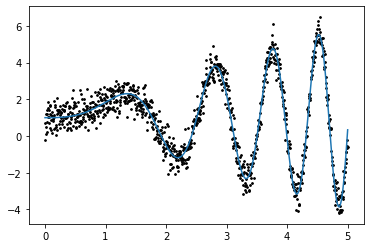

In [3]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X,y=sample(1000)
plt.scatter(X,y,s=3,c='black')
plt.show()

In [4]:
X.shape, y.shape

((1000,), (1000,))

In [5]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)
X.shape, y.shape

((1000, 1), (1000, 1))

In [6]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

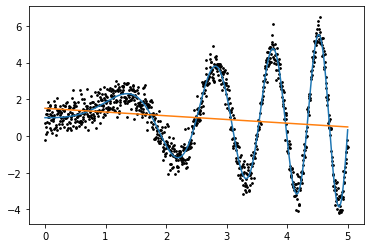

In [7]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(),y.flatten(),s=3,c='black')
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2)#2제곱항까지...
X_poly=poly_features.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [9]:
lr=LinearRegression(fit_intercept=False)
#PolynomialFeatures를 쓰게 되면 fit_intercept가 추가되기 때문

lr.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

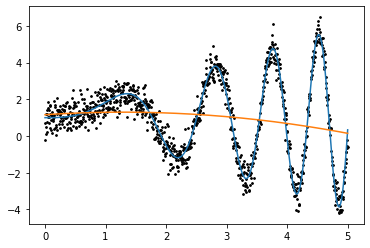

In [11]:
f_x,f_y=f(1000)
plt.plot(f_x,f_y)
plt.scatter(X.flatten(),y.flatten(),s=3,c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [12]:
poly_features=PolynomialFeatures(degree=9)#9제곱항까지...
X_poly=poly_features.fit_transform(X)
X_poly[:5]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04, 3.38514528e-06,
        5.08280073e-08, 7.63183292e-10, 1.14592086e-11, 1.72060189e-13,
        2.58348632e-15, 3.87910859e-17],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04, 8.02404808e-06,
        1.60641603e-07, 3.21604811e-09, 6.43853476e-11, 1.28899595e-12,
        2.58057247e-14, 5.16631125e-16]])

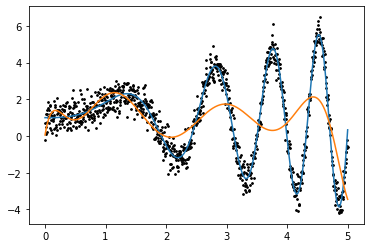

In [13]:
lr=LinearRegression(fit_intercept=False)
lr.fit(X_poly, y)
f_x,f_y=f(1000)
plt.plot(f_x,f_y)
plt.scatter(X.flatten(),y.flatten(),s=3,c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

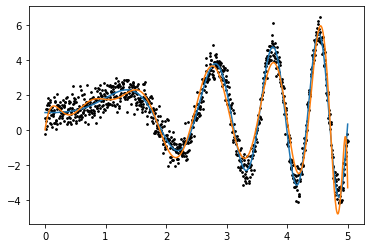

In [17]:
poly_features=PolynomialFeatures(degree=18)
X_poly=poly_features.fit_transform(X)
lr=LinearRegression(fit_intercept=False)
lr.fit(X_poly, y)
f_x,f_y=f(1000)
plt.plot(f_x,f_y)
plt.scatter(X.flatten(),y.flatten(),s=3,c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [27]:
def rmse(predictions, targets):
    return np.sqrt((predictions-targets)**2).mean()

In [28]:
poly_range=list(range(10,50))
rmse_lr_list=[]
rmse_lasso_list=[]
rmse_ridge_list=[]

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features=PolynomialFeatures(degree=poly_value)
    X_poly=poly_features.fit_transform(X)
    lr=LinearRegression(fit_intercept=False)
    lr.fit(X_poly, y)

    rmse_lr_list.append(rmse(lr.predict(X_poly), y))
    
    lasso=Lasso(fit_intercept=False)
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly),y))
    
    ridge=Ridge(fit_intercept=False)
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly),y))

C:\Users\Hae Chan Kim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2375.2551464469834, tolerance: 0.5478747008957995
  positive)
C:\Users\Hae Chan Kim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2379.616406655197, tolerance: 0.5478747008957995
  positive)
C:\Users\Hae Chan Kim\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.85534e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Hae Chan Kim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2375.7965591869597, tolerance: 0.5478747008

C:\Users\Hae Chan Kim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2295.9453456606416, tolerance: 0.5478747008957995
  positive)
C:\Users\Hae Chan Kim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2288.208018711231, tolerance: 0.5478747008957995
  positive)
C:\Users\Hae Chan Kim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2280.3629871628227, tolerance: 0.5478747008957995
  positive)
C:\Users\Hae Chan Kim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase th

In [29]:
import pandas as pd
from pandas import DataFrame
data={"poly_range":poly_range, "lr_rmse":rmse_lr_list,
     "lasso_rmse":rmse_lasso_list, "ridge_rmse":rmse_ridge_list}
df=DataFrame(data).set_index("poly_range")
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.395919,1.879366,1.475799
11,1.421267,1.880342,1.421088
12,1.347803,1.878962,1.420072
13,1.059242,1.876578,1.427835
14,1.095299,1.873474,1.340241
15,0.774420,1.870141,1.231977
16,0.595263,1.866988,1.161331
17,0.552002,1.864290,1.064808
18,0.575549,1.862198,0.725759


In [30]:
df.min()

lr_rmse       0.434172
lasso_rmse    1.859768
ridge_rmse    0.423962
dtype: float64

In [31]:
df["ridge_rmse"].sort_values().head()

poly_range
23    0.423962
22    0.424217
24    0.450872
21    0.499661
20    0.608796
Name: ridge_rmse, dtype: float64

In [32]:
poly_features=PolynomialFeatures(degree=23)
X_poly=poly_features.fit_transform(X)
ridge=Ridge()
ridge.fit(X_poly,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

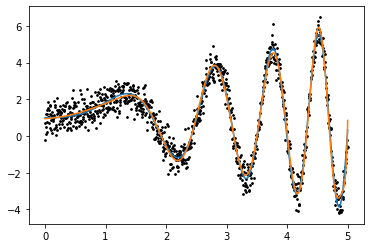

In [33]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()

In [34]:
df = pd.read_csv("yield.csv",sep="\t")
df.head()

,i,Temp,Yield
0,1,50,3.3
1,2,50,2.8
2,3,50,2.9
3,4,70,2.3
4,5,70,2.6


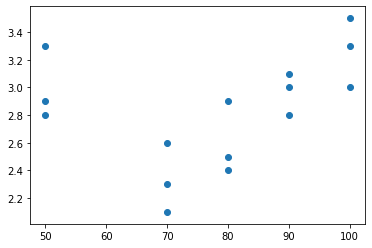

In [35]:

plt.scatter(df["Temp"], df["Yield"])
plt.show()